In [ ]:
import torch
import random
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (13., 5.)

In [ ]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

## Train dataset

In [ ]:
import sklearn.datasets
wine = sklearn.datasets.load_wine()
wine.data.shape

(178, 13)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    wine.data[:, :2],
    wine.target,
    test_size=0.3,
    shuffle=True
)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

## Model construction

In [ ]:
class WineNet(torch.nn.Module):
  def __init__(self, n_hidden_neurons):
    super(WineNet, self).__init__()

    self.fc1 = torch.nn.Linear(2, n_hidden_neurons)
    self.activ1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
    self.activ2 = torch.nn.Sigmoid()
    self.fc3 = torch.nn.Linear(n_hidden_neurons, 3)
    self.sm = torch.nn.Softmax(dim=1)
  
  def forward(self, x):
    x = self.fc1(x)
    x = self.activ1(x)
    x = self.fc2(x)
    x = self.activ2(x)
    x = self.fc3(x)
    return x

  def inference(self, x):
    x = self.forward(x)
    x = self.sm(x)
    return x

wine_net = WineNet(5)

In [ ]:
loss = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(wine_net.parameters(),
                             lr=1.0e-3)

## Training procedure

In [ ]:
batch_size = 10

for epoch_index in range(5000):
  order = np.random.permutation(len(X_train))
  for start_index in range(0, len(X_train), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    x_batch = X_train[batch_indexes]
    y_batch = y_train[batch_indexes]

    preds = wine_net.forward(x_batch)
    loss_value = loss(preds, y_batch)
    loss_value.backward()
    
    optimizer.step()

    if epoch_index % 100 == 0:
      test_preds = wine_net.forward(X_test)
      test_preds = test_preds.argmax(dim=1)
      print((test_preds == y_test).float().mean())

tensor(0.4074)
tensor(0.4074)
tensor(0.4074)
tensor(0.4074)
tensor(0.4074)
tensor(0.4074)
tensor(0.4074)
tensor(0.4074)
tensor(0.4074)
tensor(0.4074)
tensor(0.4074)
tensor(0.4074)
tensor(0.4074)
tensor(0.4074)
tensor(0.4074)
tensor(0.4074)
tensor(0.4074)
tensor(0.4074)
tensor(0.4074)
tensor(0.4074)
tensor(0.4074)
tensor(0.4074)
tensor(0.4074)
tensor(0.4074)
tensor(0.4074)
tensor(0.4074)
tensor(0.4630)
tensor(0.4630)
tensor(0.4630)
tensor(0.4630)
tensor(0.4630)
tensor(0.4630)
tensor(0.4630)
tensor(0.4630)
tensor(0.4815)
tensor(0.4815)
tensor(0.4815)
tensor(0.4815)
tensor(0.4815)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.4074)
tensor(0.4259)
tensor(0.4259)
tensor(0.4259)
tensor(0.4259)
tensor(0.4259)
tensor(0.4259)
tensor(0.4259)
tensor(0.4259)
tensor(0.4074)
tensor(0.4074)
tensor(0.4259)
tensor(0.4259)
tensor(0.4259)
tensor(0.4

## Visualizing

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)


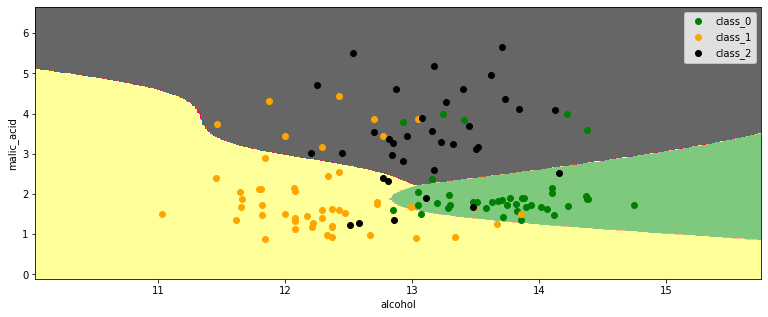

In [ ]:
n_classes = 3
plot_colors = ['g', 'orange', 'black']
plot_step = 0.02

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy = torch.meshgrid(torch.arange(x_min, x_max, plot_step),
                        torch.arange(y_min, y_max, plot_step))

preds = wine_net.inference(
    torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)
)

preds_class = preds.data.numpy().argmax(axis=1)
preds_class = preds_class.reshape(xx.shape)
plt.contourf(xx, yy, preds_class, cmap='Accent')

for i, color in zip(range(n_classes), plot_colors):
  indexes = np.where(y_train == i)
  plt.scatter(X_train[indexes, 0],
              X_train[indexes, 1],
              c=color,
              label=wine.target_names[i],
              cmap='Accent')
plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[1])
plt.legend()